# ACOL test visualisation on COCO

## Setup stuff

In [1]:
#imports and settings:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
from scipy.stats import threshold
import time, os
import _init_paths
import pandas as pd
import skimage.io as io
import sys
sys.path.append('//coco/PythonAPI/')
from pycocotools.coco import COCO
dataDir='//coco'
dataType='val2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
coco=COCO(annFile)
jtplot.style(grid=False)
%matplotlib inline
tf.logging.set_verbosity(tf.logging.INFO)

loading annotations into memory...
Done (t=6.23s)
creating index...
index created!


In [2]:
def vis_detections(im_id, class_name, bbox, score, thresh=0.8):
    """Visual debugging of detections."""
    cats = coco.loadCats(coco.getCatIds())
    classes = tuple(['__background__'] + ['__another thing__'] + [c['name'] for c in cats])
    class_name = classes[class_name]
    #img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    im = io.imread('http://mscoco.org/images/%d'%(im_id))
    #im = im[:, :, (2, 1, 0)]
    if score > thresh:
        plt.cla()
        plt.imshow(im)
        plt.gca().add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='g', linewidth=3)
            )
        plt.gca().text(bbox[0], bbox[1] - 2,
             '{:s} {:.3f}'.format(class_name, score),
             bbox=dict(facecolor='blue', alpha=0.5),
             fontsize=14, color='white')

        plt.title('{}  {:.3f}'.format(class_name, score))
        plt.grid(False)
    plt.show()

In [3]:
pd.set_option('display.max_rows', 1000)
clustCount = 5
classCount = 80
#detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/coco_2014_val/VGGnet_fast_rcnn_iter_2000002/detections_val2014_results.json')
detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/coco_2014_val/VGGnet_fast_rcnn_iter_2000002/detections_val2014_results.json')


In [4]:
detections

,bbox,category_id,cluster,image_id,score
0,"[253.601470947, 76.5984344482, 167.387145996, ...",1,3,262148,0.998266
1,"[458.644378662, 252.115707397, 23.0722045898, ...",1,3,262148,0.983161
2,"[154.146270752, 245.298324585, 26.210357666, 8...",1,3,262148,0.972574
3,"[424.800384521, 247.588378906, 33.3885498047, ...",1,3,262148,0.932830
4,"[201.415206909, 251.084518433, 32.4477844238, ...",1,3,262148,0.929470
5,"[472.243438721, 259.92767334, 21.8454589844, 7...",1,3,262148,0.888807
6,"[383.000488281, 253.119995117, 31.9767456055, ...",1,3,262148,0.863974
7,"[173.455856323, 248.829193115, 32.5422973633, ...",1,3,262148,0.598943
8,"[398.292449951, 261.160522461, 41.8743286133, ...",1,3,262148,0.531229
9,"[290.21963501, 235.942108154, 54.8890380859, 1...",1,3,262148,0.452087


## cluster spread per class

In [5]:
detections[['category_id','cluster','image_id']].groupby(['category_id', 'cluster']).count()

image_id
category_id cluster          
1           1               2
            2               4
            3          189524
2           2            6206
            8               1
3           4           47578
4           0            9434
5           3            5378
6           7           11004
7           5            9864
8           6           23851
9           1               1
            7           12246
10          5           20115
            9               1
11          1            1937
13          3            2347
14          9             715
15          2           16092
16          2           10908
            9               1
17          4            4468
18          1            7738
19          9            6555
20          5            9867
21          1            8441
22          2            5114
23          0            1685
24          3            3787
25          0            3273
            9               1
27          5           11842
28          8            6885
31          8           13397
32          4            4844
33          1            7448
            3               1
34          1            1874
35          2            6780
36          7            4279
37          2            3615
38          3            7109
39          1            4012
40          0            4149
41          6            7531
42          4            5133
43          6            5212
44          1           28986
46          6            3952
47          7           22168
48          4            6888
            8               1
49          4            8651
50          4            5119
51          7           22153
52          1            8122
53          9            5555
54          9            3764
55          6            4425
56          9            6874
57          2               1
            4            6894
58          3               1
            5            5570
59          4            6528
            5               1
60          6            5514
61          8           13694
62          5               1
            6           46436
63          6            8502
64          0           12038
            1               1
65          3            8035
67          1           22200
70          9            4764
72          2            8209
73          9            5891
74          8            2307
            9               2
75          4               1
            9            3994
76          7            3008
77          0            7318
78          6            2880
79          2            8177
            3               1
81          2               1
            9           10901
82          2            7768
84          0           21172
85          8            7715
86          6            8463
87          2            1259
            4               2
88          8            5645
90          2            2335

In [6]:
clust0=detections[(detections.category_id==1) & (detections.cluster==0) & (detections.score>0.8)]
clust3=detections[(detections.category_id==1) & (detections.cluster==3) & (detections.score>0.8)]
clust8=detections[(detections.category_id==1) & (detections.cluster==8) & (detections.score>0.8)]

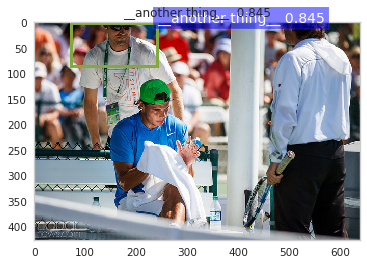

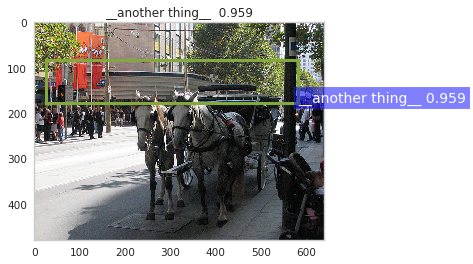

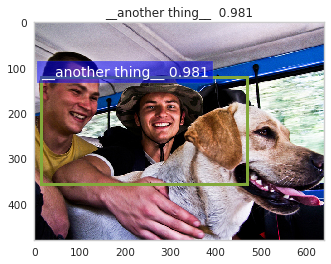

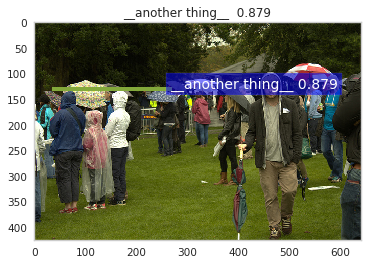

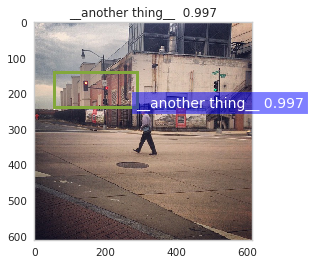

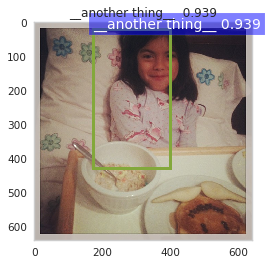

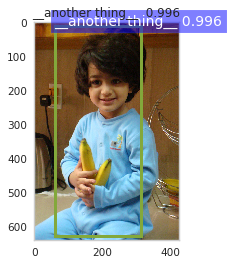

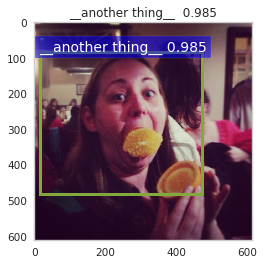

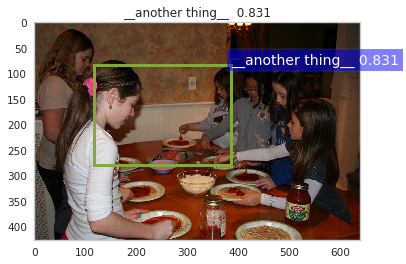

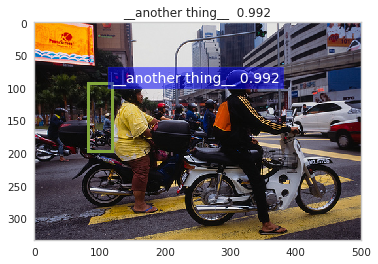

In [7]:
for i in np.random.randint(0,len(clust3),10):
    det = clust3.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

In [8]:
print len(clust0)
print len(clust3)
print len(clust8)

0
49769
0


In [9]:
dets=detections[(detections.category_id==25) & (detections.cluster==9) & (detections.score>0.8)]
for i in np.random.randint(0,len(dets),10):
    det = dets.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

ValueError: low >= high